In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import mariadb
import os
from dotenv import load_dotenv
import sqlalchemy

load_dotenv() 

mydb = mariadb.connect(
    host = os.getenv('HOST'),
    user = os.getenv('USER'),
    passwd = os.getenv('PASSWD'),
    database = os.getenv('DATABASE')
    )

In [3]:
def query_data_old(table,start_from,end_at):
    query = 'select * from {} WHERE LOCAL_TIME >= \'{}\' and LOCAL_TIME <= \'{}\';'.format(table,start_from,end_at)
    
    return pd.read_sql(query, con=mydb)

df = query_data_old('cleaned_data','2022-07-01','2022-07-02') 
df['AREA_NAME'] = df['AREA_NAME'].fillna('No area specified')
df = df.sort_values(by=['TAG_ID', 'EPOCHTIME'])  

print(len(df))

C:\Users\320159994\AppData\Local\miniforge3\envs\contacttracing\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


512759


In [4]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

Counting the number of patient and asset tags:

In [7]:
x = df.copy()
#change to epoch time
# x['LOCAL_TIME'] = pd.to_datetime(x['LOCAL_TIME'])

x['delta'] = (x['EPOCHTIME']-x['EPOCHTIME'].shift())

# def fu(row):
#     return row.total_seconds()

# x['delta']=x['delta'].apply(lambda row : fu(row))

In [ ]:
df_motion = df.loc[df['MOTION']!=0]
df_no_motion = df.loc[df['MOTION']==0]


In [8]:
y = x.loc[x['TAG_ID'].isin([17420241, 17423709, 17423766, 17420400, 17422744])]
y = y.sort_values(by=['TAG_ID', 'EPOCHTIME'])  


In [19]:
y

,EPOCHTIME,TAG_ID,MONITOR_ID,BUTTON1,BUTTON2,BUTTON3,BUTTON4,MOTION,BATTERY_LEVEL,TAG_TYPE,RSSI,RETRIES,ALIVE,DATA_INDEX,IR_ID,S_STAR,FIRMWARE_VERSION,A_STAR,R_STAR,FLOOR_ID,WIFI_X,WIFI_Y,MAC_ADDR,OBJ,CONFIDENCE,IP,LBI_DIFF,BUILDING,FLOOR,PROFILE,MODE,ZONE_ID_WIFI,PF_MONITOR_ID,MASTER_MONITOR_ID,PF_TAG_ID,LOCAL_TIME,ZONE_NAME,ZONE_TYPE,AREA_NAME,delta
1232,1656633882,17420241,512765,0,0,0,0,0,0,19,-89.0,1,0,0,175,7,24,7,7,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,406124075.0,2022-07-01 00:04:42,Aufnahme,REG,Aufnahme,-86003.0
1233,1656633882,17420241,512765,0,0,0,0,0,0,19,-88.0,2,0,0,175,7,24,7,7,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,406124075.0,2022-07-01 00:04:42,Aufnahme,REG,Aufnahme,0.0
1234,1656633883,17420241,512765,0,0,0,0,0,0,19,-92.0,1,0,0,175,7,24,7,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,406124075.0,2022-07-01 00:04:43,Aufnahme,REG,Aufnahme,1.0
1235,1656633883,17420241,512765,0,0,0,0,0,0,19,-90.0,2,0,0,175,7,24,7,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,406124075.0,2022-07-01 00:04:43,Aufnahme,REG,Aufnahme,0.0
1236,1656633883,17420241,512765,0,0,0,0,0,0,19,-87.0,3,0,0,175,7,24,7,8,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,5237,512765.0,406124075.0,2022-07-01 00:04:43,Aufnahme,REG,Aufnahme,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509177,1656719265,17423766,0,0,0,0,0,1,0,19,-84.0,2,0,1,0,7,24,7,7,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,0,NaN,397758004.0,2022-07-01 23:47:45,0,0,No area specified,21.0
509255,1656719289,17423766,0,0,0,0,0,1,0,19,-83.0,1,0,2,0,7,24,7,7,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,0,NaN,397758004.0,2022-07-01 23:48:09,0,0,No area specified,24.0
509454,1656719313,17423766,0,0,0,0,0,0,0,19,-99.0,1,0,3,0,7,24,7,19,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,0,NaN,397758004.0,2022-07-01 23:48:33,0,0,No area specified,24.0
509462,1656719313,17423766,0,0,0,0,0,0,0,19,-81.0,1,0,3,0,7,24,7,7,0,0.0,0.0,00:00:00:00:00:00,0,0.0,0.0.0.0,0,None,None,0,0,0,0,NaN,397758004.0,2022-07-01 23:48:33,0,0,No area specified,0.0


<AxesSubplot:xlabel='MOTION', ylabel='delta'>

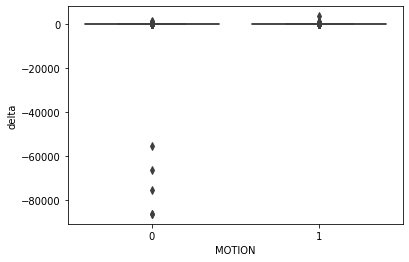

In [10]:
import matplotlib.pyplot as plt
plt.ion()
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='MOTION', y='delta',data=y)


In [ ]:
#create tag class
#iterate through tags and create multiple tag objects in a dict
#iterate through dicts and see which assets have been in contact with each other
#

In [ ]:
#look at the mean time between consecutive reports / median
#drill down for patient and asset tags 


In [ ]:
#Per tag - no of reports per department/area name 
#